In [102]:
import random
from numpy import random as rndm
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
def PlotWithCDF(data:list):
    cnt, bins, rest = plt.hist(data, bins = 25)
    pdf = cnt/sum(cnt)
    cdf = [sum(pdf[:(i + 1)]) for i in range(len(pdf))]
    plt.ylabel('Frequency')
    plt.xlabel('Data')
    plt.plot(bins[1::], cdf, label = 'CDF')
    plt.legend()
    plt.show()

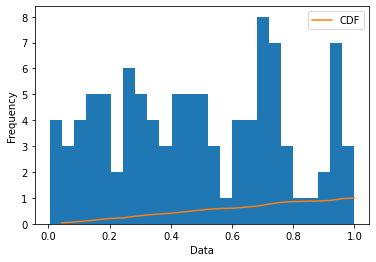

In [126]:
#Question 1
raw_data = [random.uniform(0, 1) for _ in range(100)]
PlotWithCDF(raw_data)

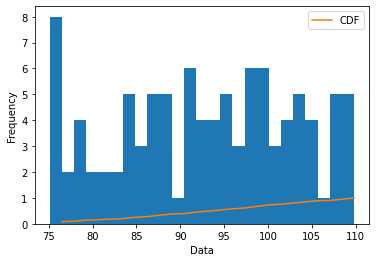

In [127]:
#Question 2
raw_data = [random.uniform(75, 110) for _ in range(100)]
PlotWithCDF(raw_data)

In [92]:
# Question 3
def GenerateBernoulli(p:int, m:int = 100)->list:
    assert (p >= 0) and (p <= 1)
    assert m >= 0
    return [True if random.uniform(0, 1) < p else False for _ in range(m)]

In [97]:
#Question 4
def GenerateGeometric(p:int, m:int = 100)->list:
    assert (p >= 0) and (p <= 1)
    assert m >= 0
    ans = []
    for _ in range(m):
        x = 1
        while not(GenerateBernoulli(p, 1)[0]):
            x += 1
        ans.append(x)
    return ans;

In [100]:
#Question 5
def GenerateBinomial(p:int, n:int, m:int = 100):
    assert (p >= 0) and (p <= 1)
    assert m >= 0
    assert n >= 0
    return [sum(GenerateBernoulli(p, n)) for _ in range(m)]

In [119]:
#Question 6
def GeneratePoisson(alpha:int, m:int)->list:
    assert alpha >= 0
    assert m >= 0
    return rndm.poisson(alpha, m)

In [118]:
#Question 7
def GenerateGaussian(mean:float, std:float, m:int):
    assert m >= 0
    assert std >= 0
    return [random.gauss(mean, std) for _ in range(m)]

In [117]:
#Question 8
def GenerateExponential(rate:float , m:int):
    assert m >= 0
    assert rate >= 0
    return [random.expovariate(rate) for _ in range(m)]

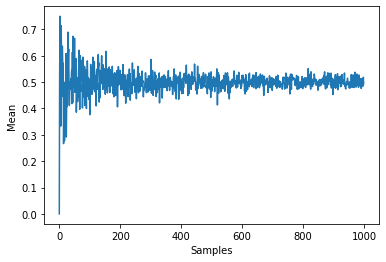

In [132]:
#Question 9
data = []
p = 0.5
m = 1000
for i in range(1, m + 1):
    data.append(sum(GenerateBernoulli(p, i))/i)
plt.plot(data)
plt.ylabel('Mean')
plt.xlabel('Samples')
plt.show()

#The value has converged to around p at around 300 samples for values p around 0.3 to 0.5 whereas it converges after 200 samples for remaining values